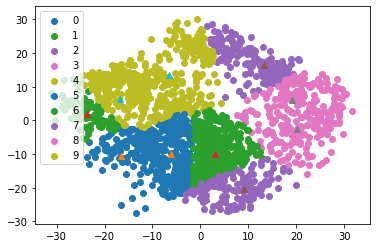

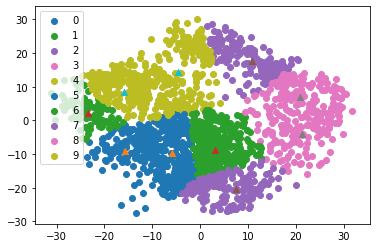

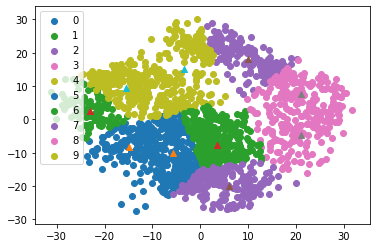

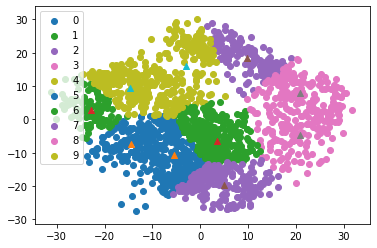

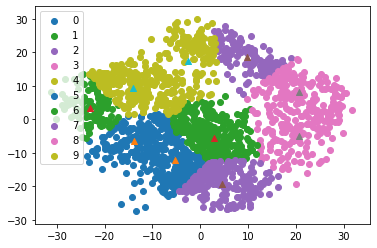

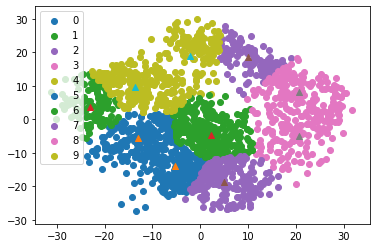

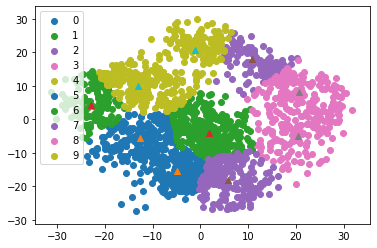

In [ ]:
#Loading the required modules

import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    #print(points.shape)
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids 
        
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
        # Uncomment this for visulasition changes in the position of the centroids
        #if(no_of_iterations%10==0): 
            #u_points = np.unique(points)
            #for i in u_points:
                #plt.scatter(x[points == i , 0] , x[points == i , 1] , label = i)
                #plt.scatter(centroids[i][0],centroids[i][1],marker="^")
            #plt.legend()
            #plt.show()
            #input()
    return points,centroids 


#Load Data
data = load_digits().data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
#Applying our function
label,centroids = kmeans(df,10,1000)

#Visualize the results

u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[i][0],centroids[i][1],marker="^")
plt.legend()
plt.show()